In [57]:
# need to import: 
# pip install "gymnasium[atari,accept-rom-license]"
import numpy as np
import matplotlib.pyplot as plt
import pickle
# import gym
import gymnasium as gym
import ale_py


In [58]:
gym.register_envs(ale_py) 

In [59]:
env = gym.make("ALE/Pong-v5", render_mode="human")
observation = env.reset()

env.render()

#print(observation)

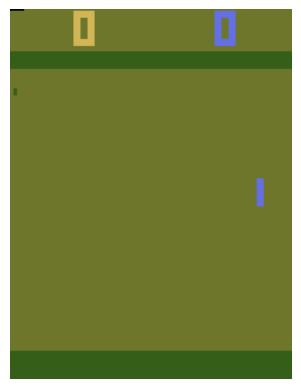

In [60]:
# to render in Jupyter Notebook
env = gym.make("ALE/Pong-v5", render_mode="rgb_array")  # Use "rgb_array" for Jupyter
observation, info = env.reset()

# Render the first frame
frame = env.render()  # Returns an image (RGB array)

# Display the frame using Matplotlib
plt.imshow(frame)
plt.axis("off")  # Hide axes
plt.show()

env.close()


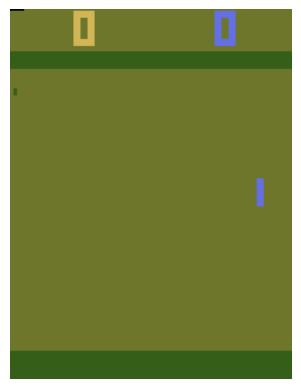

In [61]:
plt.imshow(observation)
plt.axis("off")  # Hide axes
plt.show()

In [62]:
print(observation.shape)
# (210, 160, 3)

pixel0 =  observation[10, 10]
print(pixel0)
# r, g, b
#[109 118  43]


(210, 160, 3)
[109 118  43]


(160, 160, 3)


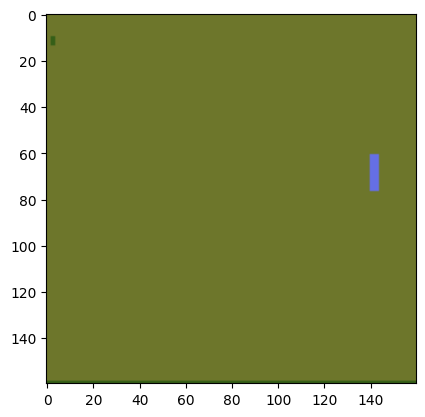

In [63]:
cropped  = observation[35:195]

print(cropped.shape)
#(160, 160, 3)

plt.imshow(cropped)

(80, 80)


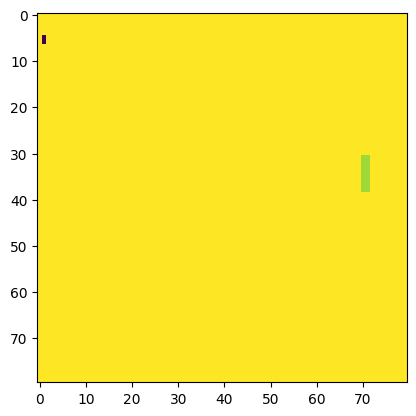

In [64]:
sampled = cropped[::2, ::2, 0]

print(sampled.shape)
#(80, 80)

plt.imshow(sampled)

(80, 80)


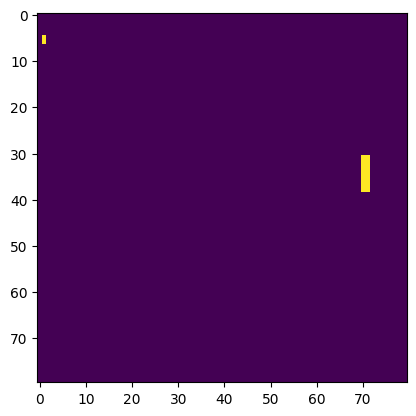

In [65]:
sampled[sampled == 144] = 0
sampled[sampled == 109] = 0
sampled[sampled != 0] = 1
print(sampled.shape)
plt.imshow(sampled)

In [66]:
sampled = sampled.astype(float).ravel()
print(sampled.shape)
# (6400,)

(6400,)


In [67]:
def prepro(I):
  """ prepro 210x160x3 uint8 frame into 6400 (80x80) 1D float vector """
  I = I[35:195] # crop
  I = I[::2,::2,0] # downsample by factor of 2
  I[I == 144] = 0 # erase background (background type 1)
  I[I == 109] = 0 # erase background (background type 2)
  I[I != 0] = 1 # everything else (paddles, ball) just set to 1
  return I.astype(np.float).ravel()

In [70]:
# hyperparameters
H = 200 # number of hidden layer neurons
batch_size = 10 # every how many episodes to do a param update?
learning_rate = 1e-4
gamma = 0.99 # discount factor for reward
decay_rate = 0.99 # decay factor for RMSProp leaky sum of grad^2
resume = False # resume from previous checkpoint?
render = False

In [74]:
# Define a 3x4 weight matrix (W1)
W1 = np.array([[0.1, 0.2, 0.3, 0.4],
               [0.5, 0.6, 0.7, 0.8],
               [0.9, 1.0, 1.1, 1.2]])

# Define a 4-dimensional input vector (x)
x = np.array([1, 2, 3, 4])

h = np.dot(W1, x)
print(h)


[ 3.  7. 11.]


In [71]:
D = 80 * 80 # input dimensionality: 80x80 grid
model = {}
model['W1'] = np.random.randn(H,D) / np.sqrt(D) # "Xavier" initialization
model['W2'] = np.random.randn(H) / np.sqrt(H)

In [ ]:
def policy_forward(x):
  # np.dot(W1, x) multiplies each row of the matrix W1 with the vector x to produce a new vector h of length H.
  # Each element in h is a weighted sum of the elements in x, where the weights are the elements of the corresponding row in W1.
  h = np.dot(model['W1'], x)
  h[h<0] = 0 # ReLU nonlinearity

  # np.dot(W2, h) multiplies the vector W2 with the vector h to produce a scalar logp.
  logp = np.dot(model['W2'], h)
  p = sigmoid(logp)
  return p, h # return probability of taking action 2, and hidden state

In [ ]:
np.random.randn(3, 4) / np.sqrt(4) # Xavier initialization
x = np.random.randn(4)

array([[ 0.11248998, -0.28304714,  0.52324192, -0.06715197],
       [ 0.00124526,  0.36530416, -0.25761929, -0.53404716],
       [-0.19862565, -0.5644461 , -0.33575847,  0.14230558]])

In [3]:
logprob_up = -1.2
logprob_down= -0.36

prob_up = np.exp(logprob_up)
prob_down = np.exp(logprob_down)

print(prob_up)
print(prob_down)

0.30119421191220214
0.697676326071031


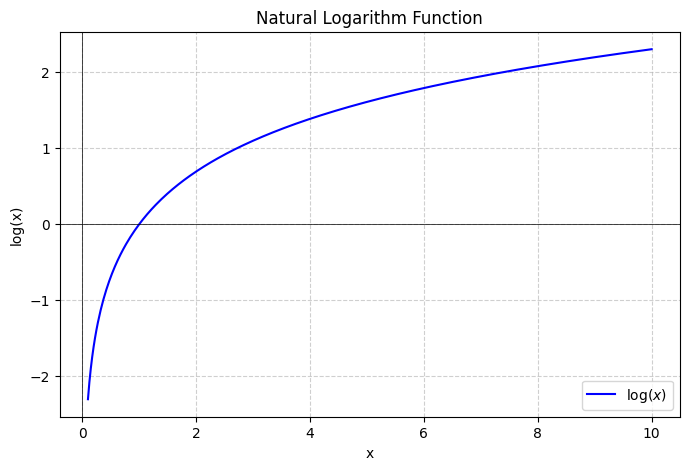

: 

In [ ]:
# Define x values (avoiding zero since log(0) is undefined)
x = np.linspace(0.1, 10, 400)
y = np.log(x)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'$\log(x)$', color='b')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel("x")
plt.ylabel("log(x)")
plt.title("Natural Logarithm Function")
plt.legend()
plt.show()
